In [1]:
from nav_sim_modules.scener import ChestSearchRoomScener

/home/tagokeniot/hypo_workspace/hypo/.venv/lib/python3.8/site-packages/quaternion/numba_wrapper.py:23: UserWarning: 

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Could not import from numba, which means that some
parts of this code may run MUCH more slowly.  You
may wish to install numba.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

  warnings.warn(warning_text)


In [2]:
test = ChestSearchRoomScener()


In [3]:
test.generate_scene()

In [4]:
test.components_info

{'obstacle': (array([ 1.27561189, -0.47609028,  5.98840069]),
  array([-3.43941718,  0.84032328,  5.96712428]),
  array([-1.54305755, -1.88729495,  4.23388076]),
  array([-1.63653628, -3.19358724,  0.86077338]),
  array([-1.86904817,  2.77991617,  3.38006638]),
  array([ 1.97475696, -1.27011799,  4.94694183]),
  array([ 1.41615116, -1.69593051,  4.25129852]),
  array([-0.90343941, -1.65066933,  0.4256528 ]),
  array([-0.56779317, -2.66938257,  1.88948241]),
  array([2.79823574, 0.59296158, 4.5478129 ])),
 'key': (array([ 1.22508982, -2.78292683,  0.        ]),
  array([-2.18817179,  0.68363624,  0.        ]),
  array([-2.96876697, -3.36699174,  0.        ]),
  array([-1.58214339,  1.62200526,  0.        ]),
  array([1.83024391, 1.63696434, 0.        ])),
 'chest': (array([ 1.458054  , -0.05453612,  0.        ]),
  array([-3.03034749,  0.62948617,  0.        ]),
  array([-0.99988331, -3.47880519,  0.        ]),
  array([-1.50769471,  3.21406956,  0.        ]),
  array([2.44526932, 0.192

In [5]:
test.spawn()

((-2.28889898667569, -0.39978886857217955, -1.7384177779155916),
 array([[100, 100, 100, ..., 100, 100, 100],
        [100, 100, 100, ..., 100, 100, 100],
        [100, 100, 100, ..., 100, 100, 100],
        ...,
        [100, 100, 100, ..., 100, 100, 100],
        [100, 100, 100, ..., 100, 100, 100],
        [100, 100, 100, ..., 100, 100, 100]], dtype=int32))

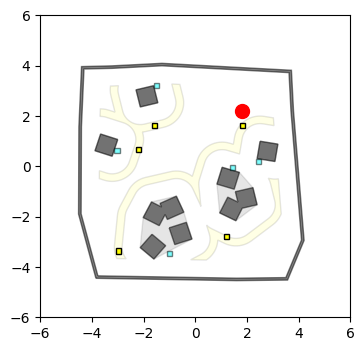

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from descartes import PolygonPatch
from shapely.ops import unary_union

fig = plt.figure(0, figsize=(4,4), dpi=100)

ax = fig.add_subplot(111)
plt.xlim(-6,6)
plt.ylim(-6,6)

wall = unary_union(test.room_config.polygons[test.room_config.tag_wall])
obstacles = unary_union(test.room_config.polygons[test.room_config.tag_obstacle])
targets = unary_union(test.room_config.polygons[test.room_config.tag_target])
keys = unary_union(test.room_config.polygons[test.room_config.tag_key])
obs_zones = unary_union(test.room_config.obstacle_hulls)
key_zones = unary_union(test.room_config.key_placing_area)

ax.add_patch(PolygonPatch(wall, fc='black', alpha=0.5, zorder=1))
ax.add_patch(PolygonPatch(obs_zones, fc='black', alpha=0.1, zorder=2))
ax.add_patch(PolygonPatch(obstacles, fc='black', alpha=0.5, zorder=3))
ax.add_patch(PolygonPatch(targets, fc='cyan', alpha=0.5, zorder=4))
ax.add_patch(PolygonPatch(key_zones, fc='yellow', alpha=0.1, zorder=5))
ax.add_patch(PolygonPatch(keys, fc='yellow', alpha=1, zorder=6))

pose, pix = test.spawn_with_map()

ax.scatter(*pose[:2], s=100, color='red')


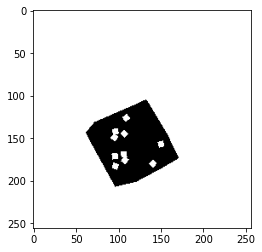

In [9]:
plt.imshow(pix, cmap='gray')